# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0381 Короткина Елизавета, Магнитов Сергей и Сарычева Александра. Вариант №6.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Дискретный фильтр - произвольная система обработки дискретного сигнала, обладающая свойствами линейности и стационарности. Под этими свойствами понимается следующее: линейность означает, что выходная реакция на сумму сигналов равна сумме реакций на эти сигналы, поданные на вход по отдельности; стационарность - что задержка входного сигнала приводит лишь к такой же задержке выходного сигнала, не меняя его формы.

Формула прямоугольников:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, y_0 = 0$$

Формула трапеций:

$$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}), y_0 = 0$$

Формула Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}), y_0 = 0$$

Правило 3/8:

$$y_{n+2} = y_{n-1} + \frac{1}{8}(s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы


**0. Инициализация данных.**

Загрузка библиотек.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

Инициализация $f$.

In [2]:
f = np.linspace(0, 0.5, 500)

**1. Вывод формул передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.Визуализация графиков передаточных функций и графиков отношения вычисляемого в результате фильтрации значения к истинному.**

*ВЫВОД ПЕРЕДАТОЧНОЙ ФУНКЦИИ ДЛЯ ФОРМУЛЫ ПРЯМОУГОЛЬНИКОВ.*

$$y_{n+1}=y_{n}+s_{n+\frac{1}{2}}$$
$$y_0=0$$

Вводятся следующие равенства:
$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$

Введённые формулы подставляются в изначальное равенство:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+e^{i\omega (n+\frac{1}{2})}$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+e^{i\omega n}e^{i\omega \frac{1}{2}}$$

Производится сокращение на одинаковую экспоненту:

$$H(\omega)e^{i\omega}=H(\omega)+e^{\frac{i\omega}{2}}$$

Группируются слагаемые, содержащие передаточную функцию:

$$H(\omega)(e^{i\omega}-1)=e^{\frac{i\omega}{2}}$$

Выражается передаточная функция:

$$H(\omega)=\frac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}$$

Числитель приводится к единице:

$$H(\omega)=\frac{1}{e^{\frac{i\omega}{2}}-e^{-\frac{i\omega}{2}}}$$

Через формулу Эйлера расписываются экспоненты:

$$H(\omega)=\frac{1}{cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})-cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})}$$

Косинусы взаимно уничтожаются:

$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$

Переход к переменной $f$:

$$\tilde{H}(f)=\frac{1}{2i\cdot sin(\pi f)}$$

In [3]:
def H_rectangle(f):
  return (1/(2j*np.sin(np.pi*f))).imag

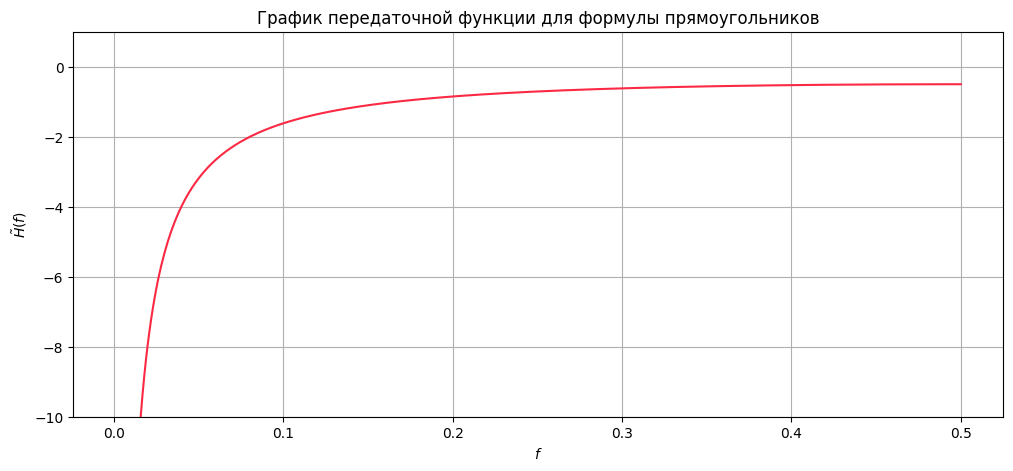

In [43]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.ylim(-10, 1)
plt.title("График передаточной функции для формулы прямоугольников")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_rectangle(f), color="#fb2943")

Отношение значений:

$$\gamma = \frac{вычисленное}{точное}=\frac{\frac{\omega}{2}}{sin(\frac{\omega}{2})}=\frac{\pi f}{sin(\pi f)}$$

In [5]:
def Value_rectangle(f):
  return np.pi*f/np.sin(np.pi*f)

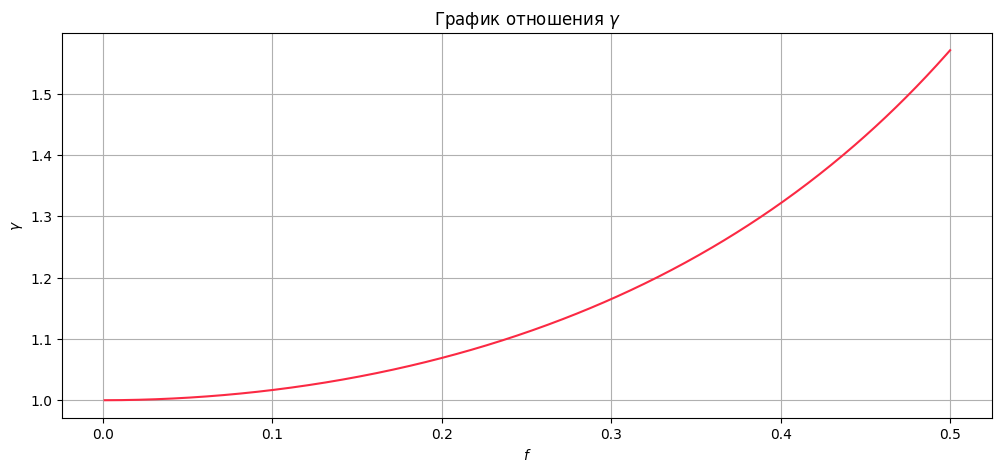

In [44]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.title("График отношения $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, Value_rectangle(f), color="#fb2943")

Формула, которая отражает отношение вычисленного значения к точному, позволяет интерпретировать частотные характеристики более простым и наглядным способом. Так, по полученному графику можно сделать вывод, что для формулы прямоугольников характерна следующая тенденция: чем выше частота, тем больше усиливается сигнал. Данная закономерность следует из монотонного возрастания функции $\gamma$.

*ВЫВОД ПЕРЕДАТОЧНОЙ ФУНКЦИИ ДЛЯ ФОРМУЛЫ ТРАПЕЦИЙ.*

$$y_{n+1}=y_{n}+\frac{1}{2}(s_{n}+s_{n+1})$$
$$y_0=0$$

Вводятся следующие равенства:
$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$

Введённые формулы подставляются в изначальное равенство:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+\frac{1}{2}(e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+\frac{1}{2}e^{i\omega n}+\frac{1}{2}e^{i\omega n}e^{i\omega}$$

Производится сокращение на одинаковую экспоненту:

$$H(\omega)e^{i\omega}=H(\omega)+\frac{1}{2}+\frac{1}{2}e^{i\omega}$$

Группируются слагаемые, содержащие передаточную функцию:

$$H(\omega)(e^{i\omega}-1)=\frac{1}{2}+\frac{1}{2}e^{i\omega}$$

Выражается передаточная функция:

$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}$$

Проводится допустимое преобразование:

$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}\cdot \frac{\frac{1}{2}e^{-\frac{\omega}{2}i}}{\frac{1}{2}e^{-\frac{\omega}{2}i}}$$

$$H(\omega)=\frac{1}{2}\frac{\frac{1}{2}e^{\frac{\omega}{2}i}+\frac{1}{2}e^{-\frac{\omega}{2}i}}{i\big( \frac{1}{2i}e^{\frac{\omega}{2}i}-\frac{1}{2i}e^{-\frac{\omega}{2}i} \big)}$$

Осуществляется переход к косинусу и синусу:

$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$

Переход к переменной $f$:

$$\tilde{H}(f)=\frac{1}{2}\frac{cos\big(\pi f \big)}{i\cdot sin\big( \pi f \big)}$$

In [7]:
def H_trapezoid(f):
  return (np.cos(np.pi*f)/(2j*np.sin(np.pi*f))).imag

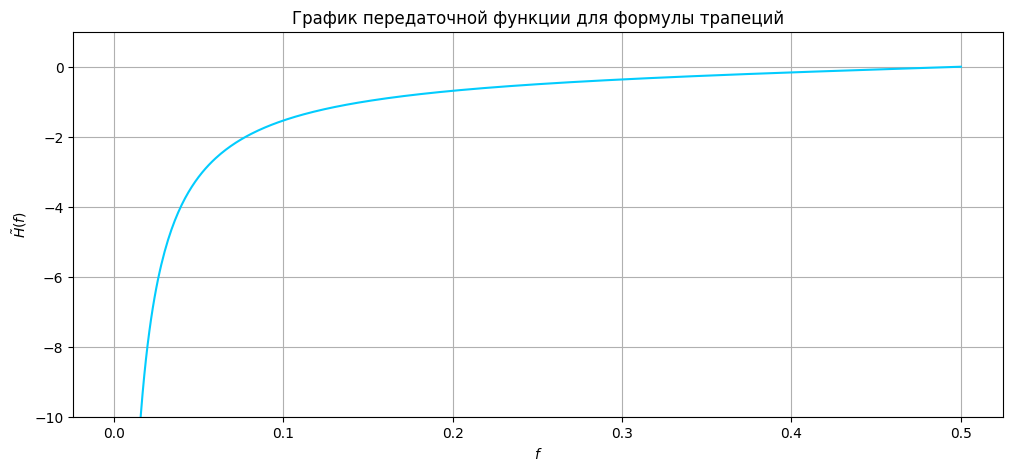

In [45]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.ylim(-10, 1)
plt.title("График передаточной функции для формулы трапеций")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_trapezoid(f), color="#02ccfe")

Отношение значений:

$$\gamma = \frac{вычисленное}{точное}=cos\Big( \frac{\omega}{2}\Big) \frac{\frac{\omega}{2}}{sin(\frac{\omega}{2})}=cos(\pi f) \frac{\pi f}{sin(\pi f)}$$

In [9]:
def Value_trapezoid(f):
  return np.cos(np.pi*f)*np.pi*f/np.sin(np.pi*f)

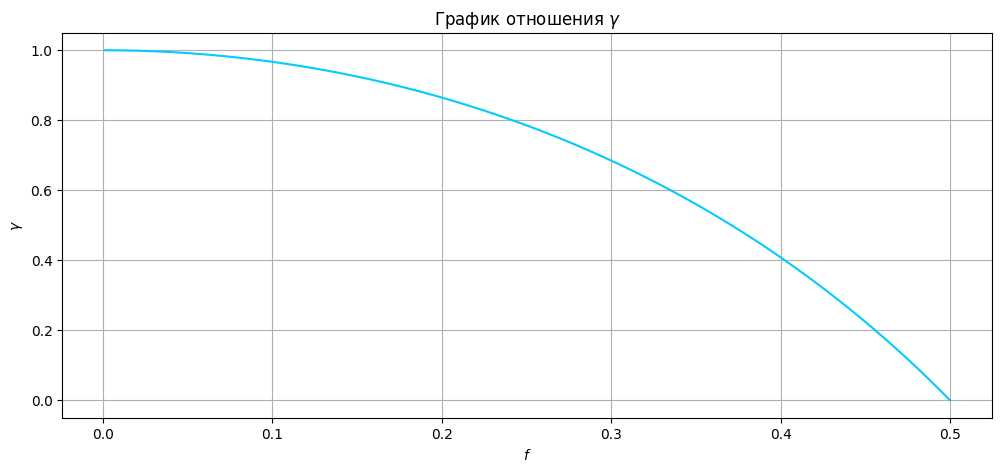

In [46]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.title("График отношения $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, Value_trapezoid(f), color="#02ccfe")

При анализе частотных характеристик правила трапеций также следует обратить внимание на полученное отношение $\gamma$. В данном случае эта функция монотонно убывает. Отсюда следует вывод, что сигнал на высоких частотах всё сильнее подавляется.

*ВЫВОД ПЕРЕДАТОЧНОЙ ФУНКЦИИ ДЛЯ ФОРМУЛЫ СИМПСОНА.*

$$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$$
$$y_0=0$$

Вводятся следующие равенства:
$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$

Введённые формулы подставляются в изначальное равенство:

$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega (n-1)}+\frac{1}{3}(e^{i\omega (n-1)}+4e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}e^{-i\omega}+\frac{1}{3}(e^{i\omega n}e^{-i\omega}+4e^{i\omega n}+e^{i\omega n}e^{i\omega})$$


Производится сокращение на одинаковую экспоненту:

$$H(\omega)e^{i\omega}=H(\omega)e^{-i\omega}+\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$

Группируются слагаемые, содержащие передаточную функцию:

$$H(\omega)(e^{i\omega}-e^{-i\omega})=\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$

Выражается передаточная функция:

$$H(\omega)=\frac{1}{3}\frac{e^{-i\omega}+4+e^{i\omega}}{e^{i\omega}-e^{-i\omega}}$$

Осуществляется переход к синусу и косинусу:

$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$

Переход к переменной $f$:

$$\tilde{H}(f)=\frac{1}{3}\frac{cos(2\pi f)+2}{i\cdot sin(2\pi f)}$$

In [11]:
def H_simpson(f):
  return ((np.cos(2*np.pi*f)+2)/(3j*np.sin(2*np.pi*f))).imag

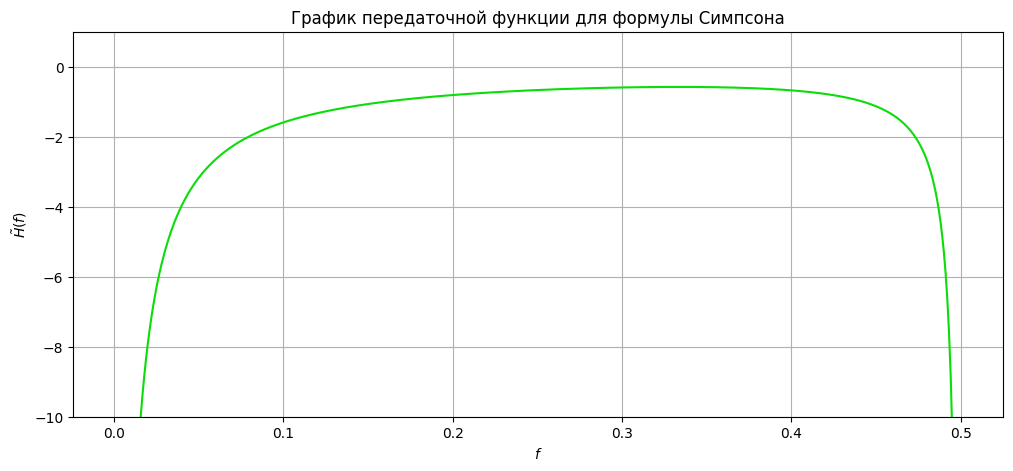

In [47]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.ylim(-10, 1)
plt.title("График передаточной функции для формулы Симпсона")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_simpson(f), color="#0add08")

Отношение значений:

$$\gamma = \frac{вычисленное}{точное}=\frac{2+cos(\omega)}{3}\cdot \frac{\omega}{sin(\omega)}=\frac{2+cos(2\pi f)}{3}\cdot \frac{2\pi f}{sin(2\pi f)}$$

In [36]:
def Value_simpson(f):
  return ((2+np.cos(2*np.pi*f))*2*np.pi*f)/(3*np.sin(2*np.pi*f))

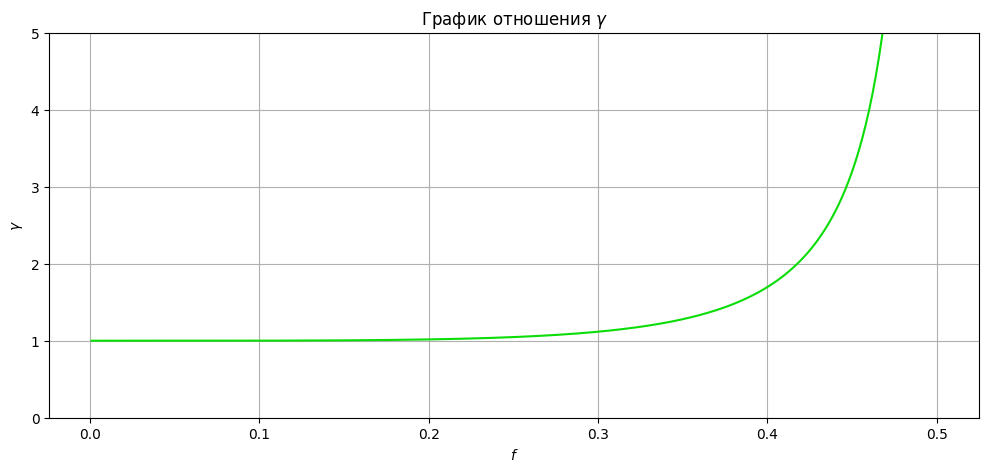

In [48]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.ylim(0, 5)
plt.title("График отношения $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, Value_simpson(f), color="#0add08")

При визуализации очередной функции $\gamma$ видно, что из-за монотонного непрерывного возрастания в методе Симпсона с увеличением частоты происходит усиление сигнала. Данная тенденция похожа на метод прямоугольников, но всё же они имеют отличия, которые будут рассмотрены в пункте 3.

**2.Вывод формулы передаточной функции рекурсивного фильтра для интегрирования "по правилу 3/8". Визуализация графика передаточной функции и графика отношения вычисляемого в результате фильтрации значения к истинному.**

*ПРАВИЛО 3/8.*

$$y_{n+2}=y_{n-1}+\frac{1}{8}(s_{n+2}+3s_{n+1}+3s_{n}+s_{n-1})$$

Вводятся следующие равенства:
$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$

Введённые формулы подставляются в изначальное равенство:

$$H(\omega)e^{i\omega (n+2)}=H(\omega)e^{i\omega (n-1)}+\frac{1}{8}(e^{i\omega (n+2)}+3e^{i\omega (n+1)}+3e^{i\omega n}+e^{i\omega (n-1)})$$

$$H(\omega)e^{i\omega n}e^{2i\omega}=H(\omega)e^{i\omega n}e^{-i\omega}+\frac{1}{8}(e^{i\omega n}e^{2i\omega}+3e^{i\omega n}e^{i\omega}+3e^{i\omega n}+e^{i\omega n}e^{-i\omega})$$

Производится сокращение на одинаковую экспоненту:

$$H(\omega)e^{2i\omega}=H(\omega)e^{-i\omega}+\frac{1}{8}(e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega})$$


Группируются слагаемые, содержащие передаточную функцию:

$$H(\omega)(e^{2i\omega}-e^{-i\omega})=\frac{1}{8}(e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega})$$

Выражается передаточная функция:

$$H(\omega)=\frac{1}{8}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{e^{2i\omega}-e^{-i\omega}}$$

Проводится допустимое преобразование:

$$H(\omega)=\frac{1}{8}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{e^{2i\omega}-e^{-i\omega}}\cdot \frac{e^{\frac{-i\omega}{2}}}{e^{\frac{-i\omega}{2}}}$$

$$H(\omega)=\frac{1}{8}\frac{e^{\frac{3i\omega}{2}}+e^{\frac{-3i\omega}{2}}+3e^{\frac{i\omega}{2}}+3e^{\frac{-i\omega}{2}}}{e^{\frac{3i\omega}{2}}-e^{\frac{-3i\omega}{2}}}$$
Осуществляется переход к синусу и косинусу:

$$H(\omega)=\frac{1}{8}\frac{cos(\frac{3\omega}{2})+3cos(\frac{\omega}{2})}{i\cdot sin(\frac{3\omega}{2})}$$

Переход к переменной $f$:

$$\tilde{H}(f)=\frac{1}{8}\frac{cos(3\pi f)+3cos(\pi f)}{i\cdot sin(3\pi f)}$$

In [15]:
def H_rule38(f):
  return ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag

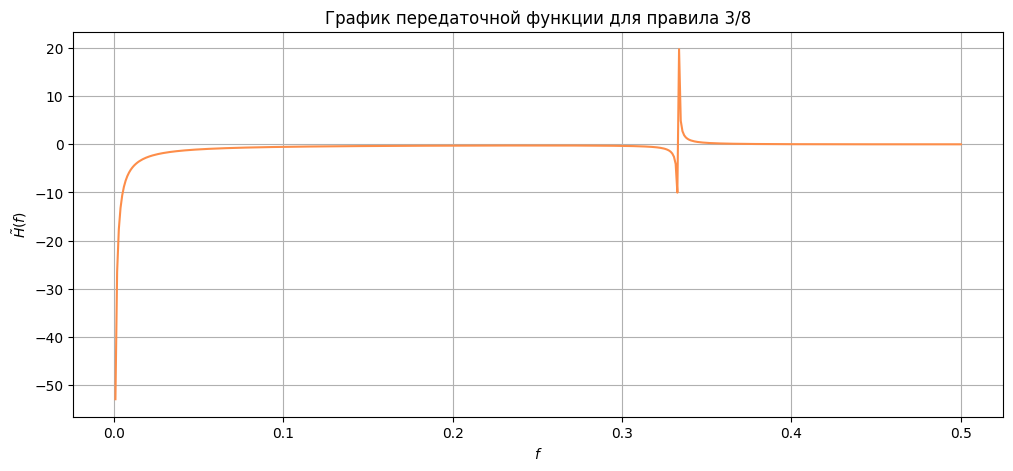

In [49]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.title("График передаточной функции для правила 3/8")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_rule38(f), color="#fd8d49")

Отношение значений:
$$\gamma = \frac{вычисленное}{точное}=\frac{cos(\frac{3\omega}{2})+3cos(\frac{\omega}{2})}{12} \frac{\frac{3\omega}{2}}{sin(\frac{3\omega}{2})}=\frac{cos(3\pi f)+3cos(\pi f)}{12} \frac{3\pi f}{sin(3\pi f)}$$

In [17]:
def Value_rule38(f):
  return (np.cos(3*np.pi*f)+3*np.cos(np.pi*f))*3*np.pi*f/(12*np.sin(3*np.pi*f))

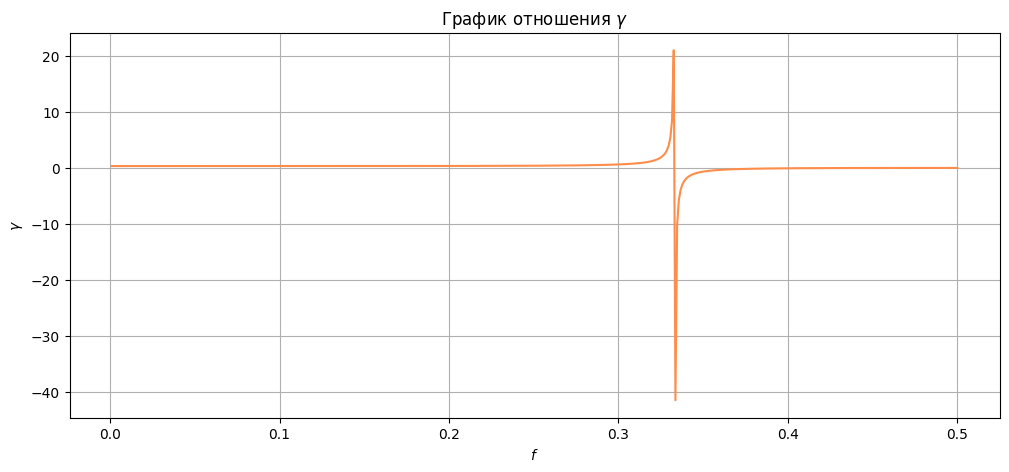

In [50]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 5))
plt.title("График отношения $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, Value_rule38(f), color="#fd8d49")

Частотные характеристики полученной функции носят следующий характер: на частоте ~0.33 сигнал резко усиливается, а затем происходит стремительный спад, который характеризует сильное его подавление. На остальной частотной области значение константно держится около 0.

**3. Сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п.1 и 2.**

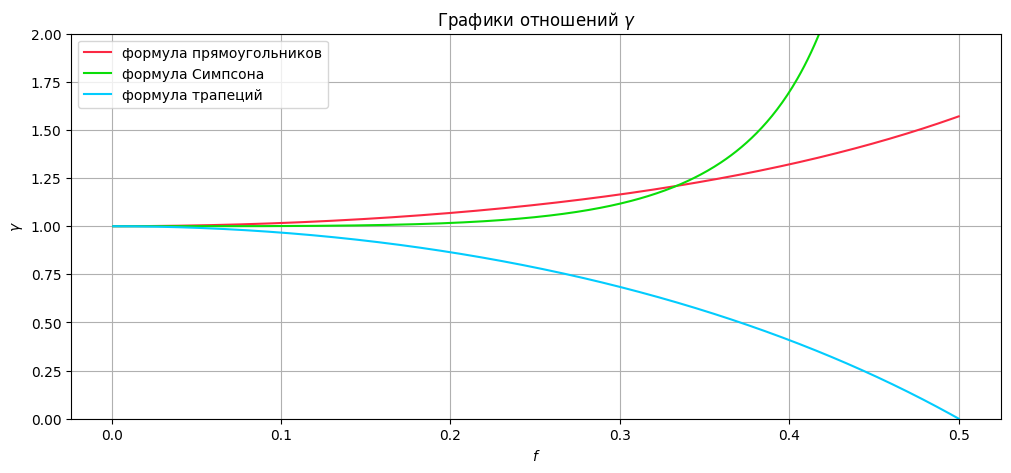

In [51]:
plt.figure(figsize=(12, 5))
plt.ylim(0, 2)
plt.title("Графики отношений $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, Value_rectangle(f), color="#fb2943", label="формула прямоугольников")
plt.plot(f, Value_simpson(f), color="#0add08", label="формула Симпсона")
plt.plot(f, Value_trapezoid(f), color="#02ccfe", label="формула трапеций")
plt.legend()

В ходе проведения сравнительной характеристики исследованных фильтров были сделаны следущие заключения. При использовании передаточной функции для формулы трапеций происходит подавление сигнала на высоких частотах, т.е. уменьшается амплитуда переданных компонент. Передаточные функции для формулы прямоугольников или формулы Симпсона обладают противоположной тенденцией: чем выше частота, тем сильнее становится сигнал. Но при сравнении двух последних методов видно, что формула Симпсона позволяет гораздно быстрее и сильнее увеличивать сигналы, в свою очередь формула прямоугольников осуществляет изменения медленнее. Передаточная функция для правила 3/8 ведет себя совершенно по-другому. На определенной частоте происходит два резких скачка: сначала сигнал резко усиливается, а затем резко подавляется, на всем остальном частотном промежутке сигнал блокируется. Таким образом, можно сделать вывод, что каждый фильтр индивидуален и несет в себе уникальные характеристики, которые стоит учитывать в зависимости от требований к обработке сигналов.

## Выводы

В ходе практической работы были исследованы рекурсивные фильтры: формула прямоугольников, формула трапеций, формула Симпсона и правило 3/8. Для каждого случая были выведены формулы передаточных функций, а также исследованы отношения вычисленных значений к точным. Полученные результаты были визуализированы, а затем с помощью полученных графиков был проведён сравнительный анализ частотных характеристик передаточных функций.